In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Generate dataset using make_blobs function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y).

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=2000,n_features=3,random_state = 16)


### Explore and analyse raw data.

In [3]:
print(X.shape)


(2000, 3)


In [4]:
data = pd.DataFrame(X, y)
data=pd.DataFrame({"Feature_1":X[:,0],"Feature_2":X[:,1],"Feature_3":X[:,2],"Output":y})
data.head()

,Feature_1,Feature_2,Feature_3,Output
0,-4.603272,0.600661,1.185056,0
1,-8.027156,-3.996763,-5.519054,1
2,-6.754389,0.823564,1.969903,0
3,-4.576895,2.212013,1.138697,0
4,3.228225,-6.823119,-7.770792,2


In [5]:
data.describe()

,Feature_1,Feature_2,Feature_3,Output
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,-3.603649,-3.005423,-4.363498,0.999500
std,5.497942,3.113402,4.120184,0.816599
min,-11.925552,-9.367248,-11.415295,0.000000
25%,-8.306266,-6.061365,-7.908903,0.000000
50%,-5.604859,-2.828923,-5.460703,1.000000
75%,3.065844,-0.150851,0.284258,2.000000
max,7.103955,3.545174,4.000370,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  2000 non-null   float64
 1   Feature_2  2000 non-null   float64
 2   Feature_3  2000 non-null   float64
 3   Output     2000 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 54.8 KB


In [7]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

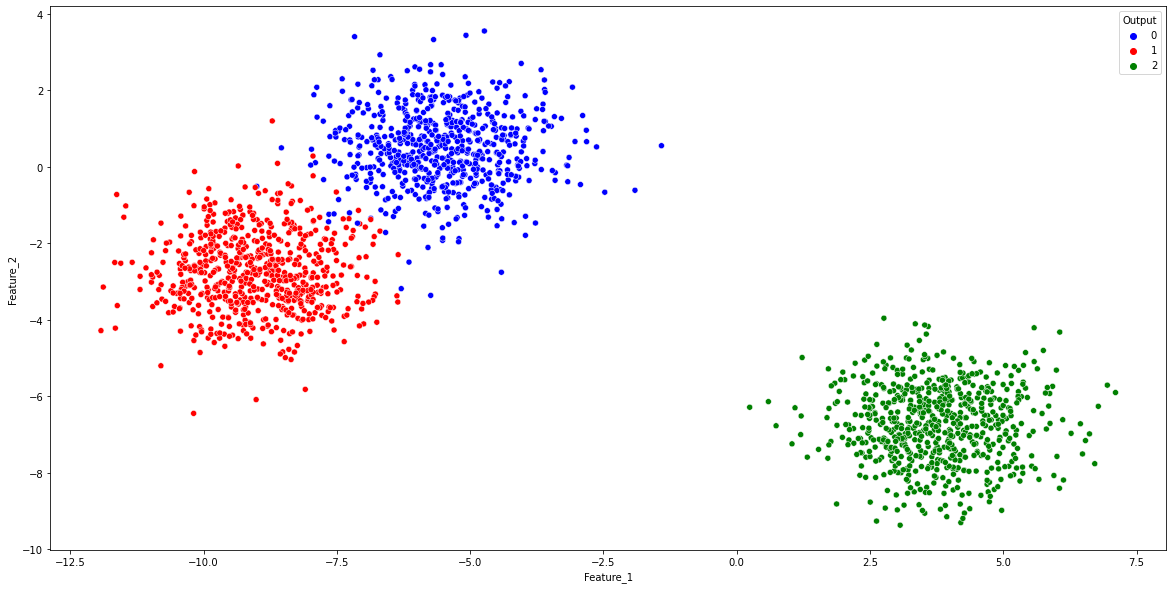

In [8]:
color_table = {0:'blue', 1:'red', 2:'green'}
sns.scatterplot(x="Feature_1", y="Feature_2", hue="Output", data=data, palette=color_table)


<AxesSubplot:xlabel='Feature_3', ylabel='Density'>

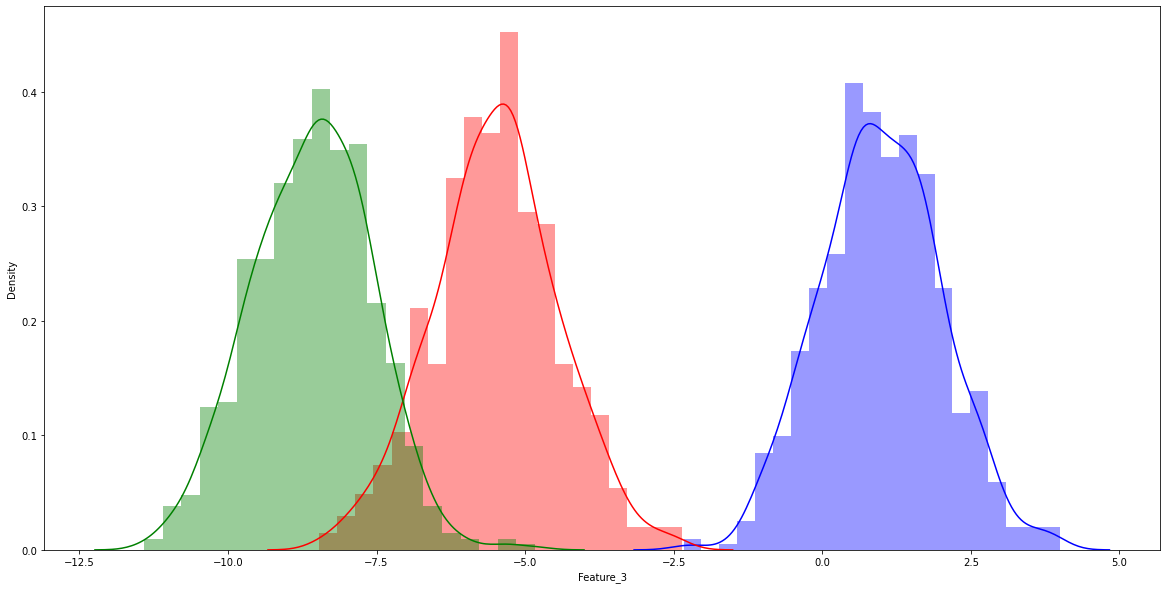

In [9]:
sns.distplot(data[data.Output == 0].Feature_3,color="blue")
sns.distplot(data[data.Output == 1].Feature_3,color="red")
sns.distplot(data[data.Output == 2].Feature_3,color="green")

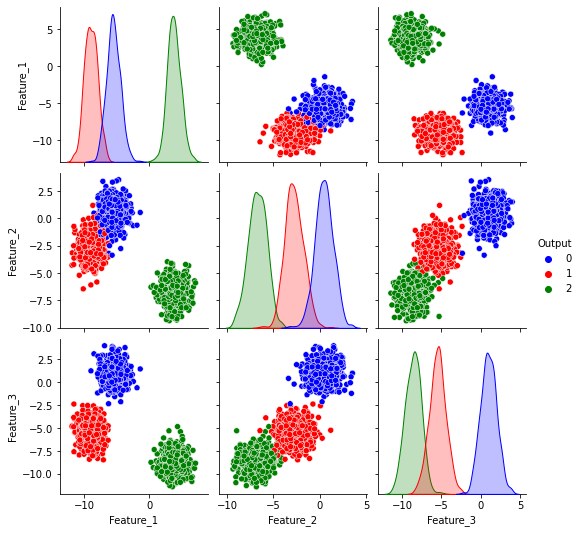

In [10]:
sns.pairplot(data, hue="Output",palette=color_table )

### Do preprocessing for classification
* Check the number of missing values in the data
* Check the number of "?" in the data
* Check the outliers
* Check the correlation of the features
* Feature scaling

In [11]:
data.isna().sum()

Feature_1    0
Feature_2    0
Feature_3    0
Output       0
dtype: int64

In [12]:
data.isin(['?']).sum()

Feature_1    0
Feature_2    0
Feature_3    0
Output       0
dtype: int64

In [13]:
data_n = pd.DataFrame(X, y)

from scipy import stats
z = np.abs(stats.zscore(data_n))
z

array([[0.18186315, 1.15853535, 1.34701336],
       [0.80477619, 0.31849007, 0.28053226],
       [0.57321943, 1.23014778, 1.53754921],
       ...,
       [1.10191913, 0.83297791, 1.17625599],
       [0.14158006, 0.82694129, 1.27106829],
       [0.70860655, 0.08653446, 0.09893963]])

In [14]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

0

In [15]:
corr= data_n.corr()
corr


,0,1,2
0,1.000000,-0.694247,-0.522388
1,-0.694247,1.000000,0.887613
2,-0.522388,0.887613,1.000000


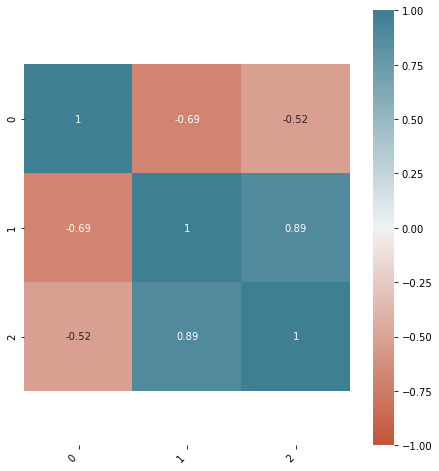

In [18]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

### Observations from the preprocessing step
* There is no missing value in the raw data so no treatment is done for missing values.
* There is no "?" mark in the raw data so no treatment is done.
* We applied Z-score method to find the outliers. We found that there is no outlier in the data when the outlier criteriea is selected as 𝜇∓3𝜎. Using the heatmap we checked the correlation of the features. We decide to keep all the features in the model.
* Since use decision trees algorithm, we do not need to scale the data.

### Split your dataset into train and test test (0.7 for train and 0.3 for test).

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11) 
((X_train.shape),(X_test.shape))

((1400, 3), (600, 3))

The data is split into two sets: (1) Training set and (2) test set. The training set has 1400 data instances and the test set has 600 data instances.

### Decision Tree Algorithm 

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=17)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))


Accuracy of train: 1.0
Accuracy of test: 0.9983333333333333


Bias for training = 1-1 = 0
Bias for test = 1-0.998 = 0.002

Variance = test bias - training bias = 0.002

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      0.99      1.00       187
           2       1.00      1.00      1.00       199

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [22]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))


Precision = 0.9984496124031007
Recall = 0.9982174688057041
Accuracy = 0.9983333333333333
F1 Score = 0.9983293441738482


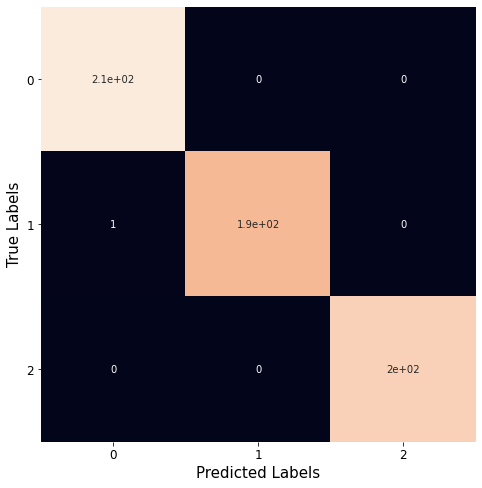

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(np.unique(y), fontsize = 12)
ax.yaxis.set_ticklabels(np.unique(y), fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()


### XGBoost Algorithm

In [24]:
import xgboost as xgb
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

[22:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:

preds = model.predict(dmatrix_test)
preds[:10]

array([[0.99631566, 0.00185812, 0.00182624],
       [0.00187543, 0.99624676, 0.00187779],
       [0.0027623 , 0.9944719 , 0.00276576],
       [0.00187543, 0.99624676, 0.00187779],
       [0.0018312 , 0.00186551, 0.9963033 ],
       [0.99631566, 0.00185812, 0.00182624],
       [0.00187543, 0.99624676, 0.00187779],
       [0.00187543, 0.99624676, 0.00187779],
       [0.0018312 , 0.00186551, 0.9963033 ],
       [0.99631566, 0.00185812, 0.00182624]], dtype=float32)

In [26]:
best_preds = np.asarray([np.argmax(line) for line in preds])


In [27]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9984496124031007
Recall = 0.9982174688057041
Accuracy = 0.9983333333333333


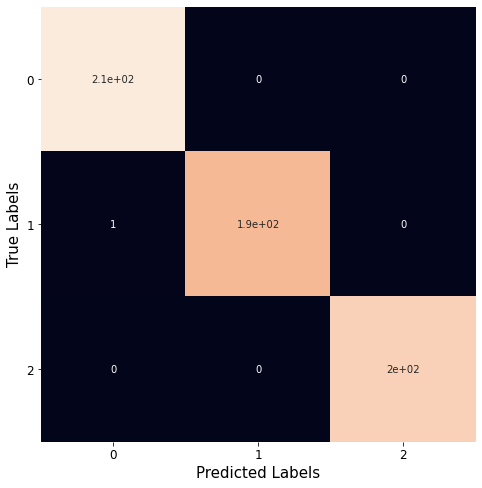

In [28]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(np.unique(y), fontsize = 12)
ax.yaxis.set_ticklabels(np.unique(y), fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### Decision Tree with Hyperparameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from xgboost.sklearn import XGBClassifier

DT_params = { 'max_depth':[3,4,5,6,7],
                'min_samples_split':[2,3,4,5,6]}

DT_model = DecisionTreeClassifier(random_state=13)
DT_clf = GridSearchCV(DT_model,DT_params)
DT_clf.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=13),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [ ]:
DT_preds = DT_clf.predict(X_test)
print("Train Score {:.6f}".format(DT_clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(DT_clf.score(X_test,y_test)))

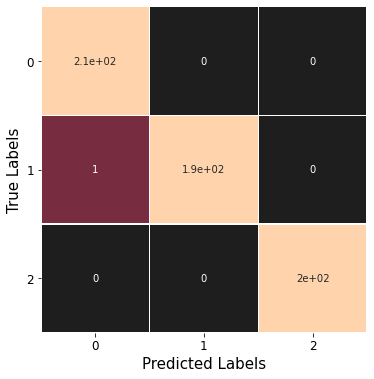

In [119]:
DT_pred = DT_clf.predict(X_test)
DT_cm = confusion_matrix(y_test, DT_pred)

plt.figure(figsize=(6, 6))
ax = sns.heatmap(tree_cm, vmax=3, center=0, linewidths=.5,square=True, annot = True, cbar=False)
ax.xaxis.set_ticklabels(np.unique(y), fontsize = 12)
ax.yaxis.set_ticklabels(np.unique(y), fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()


### Evaluation of Decision Tree and XGBoost algorithms with and without GridSearchCV

In [128]:
print("Decision Tree without GridSearchCV")
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))
print("------------------------------------------------------------")
print("\n")
print("XGBoost without GridSearchCV")
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("F1 Score = {}".format(f1_score(y_test, best_preds,average='macro')))
print("------------------------------------------------------------")
print("\n")
print("Decision Tree with GridSearchCV")
print("Precision = {}".format(precision_score(y_test, DT_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, DT_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, DT_pred)))
print("F1 Score = {}".format(f1_score(y_test, DT_pred,average='macro')))


Decision Tree without GridSearchCV
Precision = 0.9984496124031007
Recall = 0.9982174688057041
Accuracy = 0.9983333333333333
F1 Score = 0.9983293441738482
------------------------------------------------------------


XGBoost without GridSearchCV
Precision = 0.9984496124031007
Recall = 0.9982174688057041
Accuracy = 0.9983333333333333
F1 Score = 0.9983293441738482
------------------------------------------------------------


Decision Tree with GridSearchCV
Precision = 0.9984496124031007
Recall = 0.9982174688057041
Accuracy = 0.9983333333333333
F1 Score = 0.9983293441738482


We see that all results with are the same In all cases only 1 prediction is wrong. All methods performs well. We see that there is no underfitting or overfitting problem. The bias and the variance are also very low.